In [ ]:
#Playing around with data visualizations to compare boro and total traffic

In [1]:

#imports (use pip install 'package')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
from scipy.stats import ttest_ind
import geocoder
import folium
from haversine import haversine
% matplotlib inline
import seaborn as sns
from matplotlib import rcParams
import datetime

In [2]:
#Load the csv file for green taxis August 2013 into a pandas dataframe
green = pd.read_csv('Cleaned_Green_Count.csv')
df_green = pd.DataFrame(green)

#Load the cleaned csv file for NYC 2012-2013 traffic into a pandas datafram
traffic = 'Cleaned_Traffic_Count_Coordinates.csv'
df_traffic = pd.read_csv(traffic)

<Container object of 2 artists>

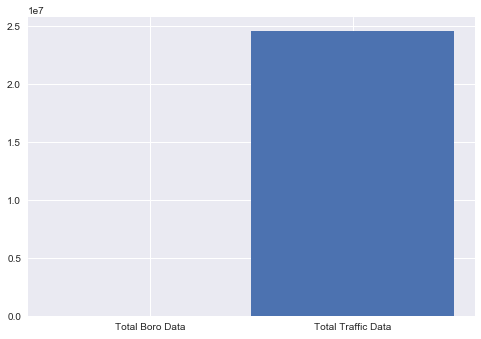

In [11]:
#Visualize the difference in size of the two datasets. Traffic is two years worth of overall traffic in NYC. Green is just the collected data from the boro taxis

greenSum = len(df_green)
trafficSum = df_traffic['Total Traffic'].sum()

fig, ax  = plt.subplots()
ax.bar([1, 2], [greenSum, trafficSum], width=1,
       tick_label=['Total Boro Data', 'Total Traffic Data'], align='center')